<a href="https://colab.research.google.com/github/navgaur/Statistical-Mech-LOCF/blob/main/MaxwellDist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot the Maxwell speed distribution function at different temperatures in a 3-dimension system. Calculate the average speed, root mean square and most probable speed**

Maxwell-Boltzmann speed distribution is a probability distribution describing the speeds of particles in a gas at a certain temperature. The formula for mono-atomic ideal gas is given by :

$$
f(v) = 4 \pi v^2 \left(\frac{m}{2 \pi k T} \right)^{3/2}  e^{-\frac{mv^2}{2 k T}}
$$

where
* $f(v)$ is teh distribution function: probably density of distribution
* $m$ mass of the gas particle
* $k$ Boltzman constant
* $T$ Temperature of gas in Kelvin
* $v$ speed of the particle



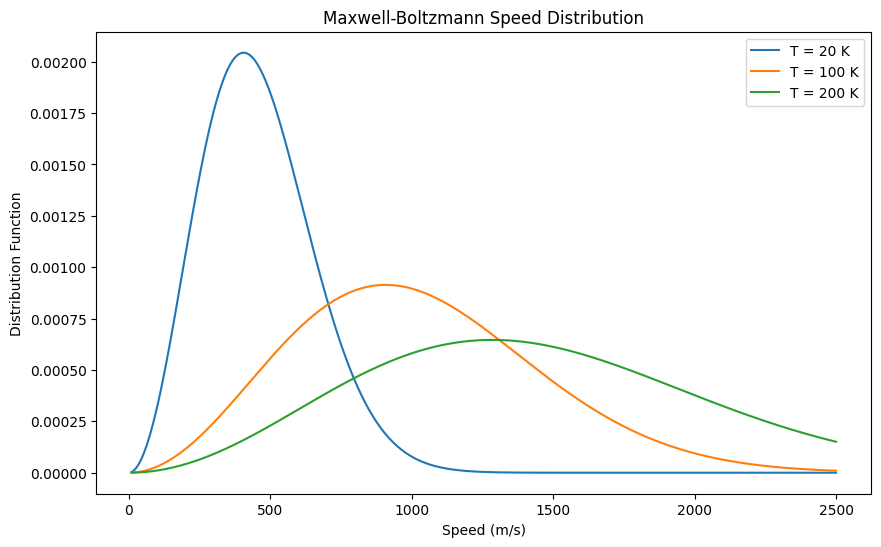

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, pi

# Constants
amu=1.66e-27  #in Kg
m = 2.016 * amu # Hydrogen
k = Boltzmann  # Boltzmann constant

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_speed_distribution(v, T):
    return (m / (2 * pi * k * T))**(3 / 2) * 4 * pi * v**2 * np.exp(-m * v**2 / (2 * k * T))

# Temperature
temperatures = [20,100,200]  # in Kelvin

# Speed values
v_values = np.linspace(10, 2500, 500)


# Plotting
plt.figure(figsize=(10, 6))
for T in temperatures:
  # Calculate distribution at the given temperature
  distribution = maxwell_speed_distribution(v_values, T)
  plt.plot(v_values, distribution, label=f'T = {T} K')

plt.title('Maxwell-Boltzmann Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Distribution Function')
plt.legend()
plt.show()


Temperature: 25 K
Average Speed: 512.49
Root Mean Square Speed: 556.25
Most Probable Speed: 455.33

Temperature: 100 K
Average Speed: 1024.97
Root Mean Square Speed: 1112.51
Most Probable Speed: 909.66

Temperature: 200 K
Average Speed: 1449.53
Root Mean Square Speed: 1573.32
Most Probable Speed: 1283.22



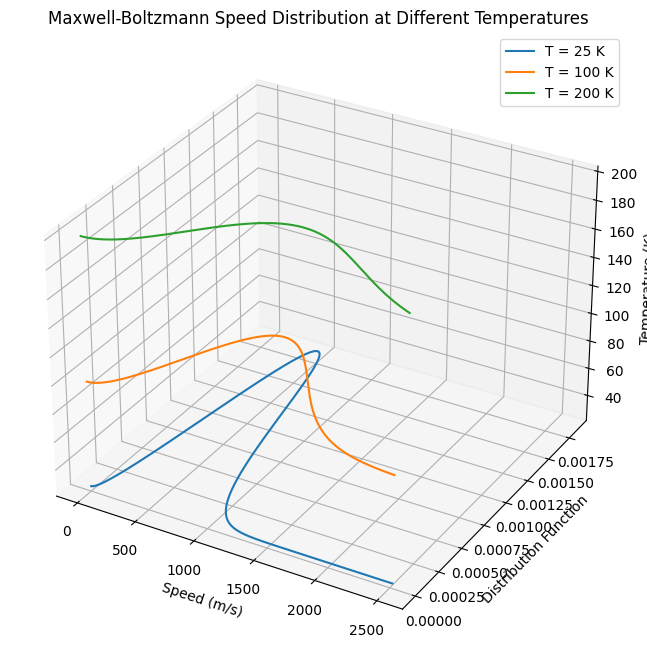

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, pi
from scipy.integrate import quad

# Constants
#m = 1.0  # mass of the gas particles
amu=1.66e-27  #in Kg
m = 2.016 * amu # Hydrogen
k = Boltzmann  # Boltzmann constant

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_speed_distribution(v, T):
    return (m / (2 * pi * k * T))**(3 / 2) * 4 * pi * v**2 * np.exp(-m * v**2 / (2 * k * T))

# Temperature values
temperatures = [25, 100, 200]  # in Kelvin

# Speed values
v_values = np.linspace(1, 2520, 500)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for T in temperatures:
    distribution = maxwell_speed_distribution(v_values, T)
    ax.plot(v_values, distribution, T, label=f'T = {T} K')

    # Calculate average speed, root mean square speed, and most probable speed
    avg_speed, _ = quad(lambda v: v * maxwell_speed_distribution(v, T), 0, np.inf)
    avg_speed /= quad(lambda v: maxwell_speed_distribution(v, T), 0, np.inf)[0]

    rms_speed = np.sqrt(quad(lambda v: v**2 * maxwell_speed_distribution(v, T), 0, np.inf)[0] /
                       quad(lambda v: maxwell_speed_distribution(v, T), 0, np.inf)[0])

    most_probable_speed = v_values[np.argmax(distribution)]

    print(f'Temperature: {T} K')
    print(f'Average Speed: {avg_speed:.2f}')
    print(f'Root Mean Square Speed: {rms_speed:.2f}')
    print(f'Most Probable Speed: {most_probable_speed:.2f}')
    print()

ax.set_xlabel('Speed (m/s)')
ax.set_ylabel('Distribution Function')
ax.set_zlabel('Temperature (K)')
ax.legend()
plt.title('Maxwell-Boltzmann Speed Distribution at Different Temperatures')
plt.show()
